# Praca domowa 6
### Mateusz Krzyziński, grupa 2


#### Import pakietów

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Wczytanie danych

In [2]:
from sklearn.datasets import fetch_olivetti_faces
faces, _ = fetch_olivetti_faces(return_X_y = True)

In [3]:
faces.shape

(400, 4096)

Mamy 400 obrazków w wymiarze 64x64px, a więc łącznie 4096px. 

Poniżej funkcja umożliwiająca narysowanie wybranych obrazków. 

In [4]:
def plot_images(data, title, n_col, n_row):
    plt.figure(figsize=(4 * n_col, 4 * n_row))
    plt.subplots_adjust(top=0.95)
    for i, image in enumerate(data):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(image.reshape((64, 64)), cmap=plt.cm.gray)
        plt.xticks(())
        plt.yticks(())
    plt.suptitle(title, size=16)
    plt.show()

### 0. Narysować wybrane obrazy

W zbiorze 10 kolejnych obrazków odpowiada jednej twarzy, zatem wyświetlę twarze 20 różnych osób. 

In [36]:
ind = np.arange(0, 200, 10)

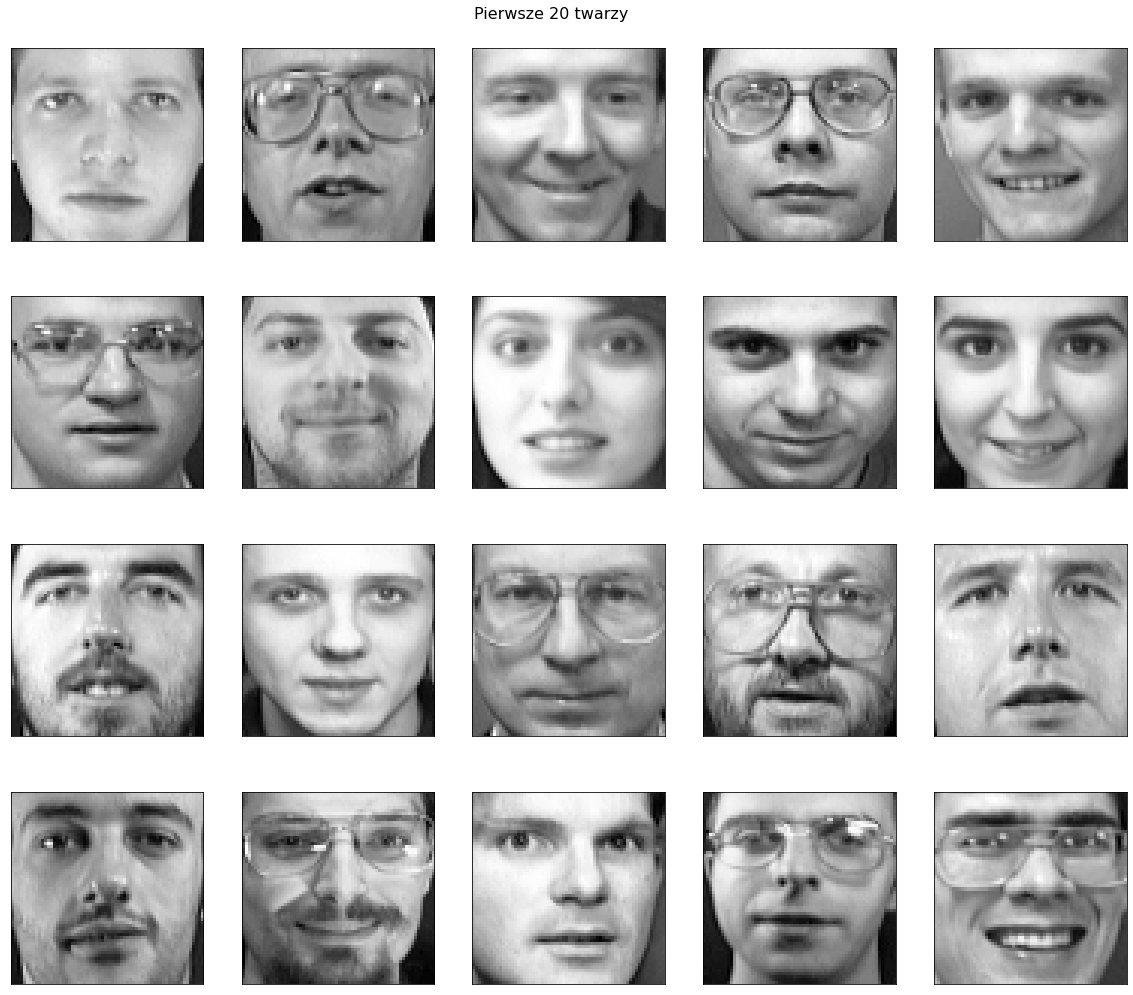

In [37]:
plot_images(faces[ind], "Pierwsze 20 twarzy", 5, 4) #kind of scary

### 1. Wykorzystać algorytm PCA do kompresji zbioru Olivetti Faces. Dobrać odpowiednią liczbę składowych. Po transformacji obliczyć stopień kompresji. Rozmiar obrazka: liczba wartości numerycznych

In [38]:
from sklearn.decomposition import PCA

In [39]:
pca = PCA(whiten = True)

In [40]:
pca.fit(faces)

PCA(whiten=True)

Przy pomocy 83 składowych, z których każda odpowiada za przynajmniej 0.1% wariancji w danych, możemy wyjaśnić łącznie ponad 92% wariancji. 

In [41]:
np.cumsum(pca.explained_variance_ratio_[pca.explained_variance_ratio_ > 0.001])

array([0.2381273 , 0.378067  , 0.4577531 , 0.5077364 , 0.5438349 ,
       0.5754043 , 0.5996726 , 0.6200366 , 0.63961774, 0.656339  ,
       0.6722912 , 0.686661  , 0.6991284 , 0.7105997 , 0.7212285 ,
       0.73100567, 0.7401963 , 0.74835205, 0.7558908 , 0.7633606 ,
       0.7703464 , 0.77649266, 0.78233194, 0.7880292 , 0.7934911 ,
       0.7988097 , 0.80394787, 0.80890626, 0.8134829 , 0.8178947 ,
       0.82191473, 0.8257566 , 0.8293761 , 0.83272153, 0.83592534,
       0.83908576, 0.8421372 , 0.8451236 , 0.847945  , 0.85068506,
       0.8532828 , 0.8558227 , 0.85826814, 0.8606665 , 0.8629754 ,
       0.8652396 , 0.86746246, 0.8696669 , 0.8717561 , 0.8738059 ,
       0.8757743 , 0.8776887 , 0.8795392 , 0.8813286 , 0.8831047 ,
       0.8848295 , 0.8865154 , 0.88815707, 0.88977593, 0.89135987,
       0.8929142 , 0.8944365 , 0.8959361 , 0.8974132 , 0.8988393 ,
       0.90024525, 0.90161467, 0.9029544 , 0.90426356, 0.9055508 ,
       0.90682507, 0.9080874 , 0.90932536, 0.9105387 , 0.91171

In [42]:
sum(pca.explained_variance_ratio_ > 0.001)

83

In [43]:
pca_used = PCA(n_components = 83, whiten = True)
faces_transformed = pca_used.fit_transform(faces)

In [44]:
CR = faces.shape[1]/faces_transformed.shape[1]
CR

49.34939759036145

In [45]:
print(f"Stopień kompresji wynosi {CR:.2f}.")

Stopień kompresji wynosi 49.35.


### 2. Przeprowadzić transformację odwrotną (inverse_transform). Narysować, porównać z pkt. 0. Obliczyć błąd rekonstrukcji w postaci błędu RMSE dla każdego obrazu.

In [16]:
faces_inversed = pca_used.inverse_transform(faces_transformed)

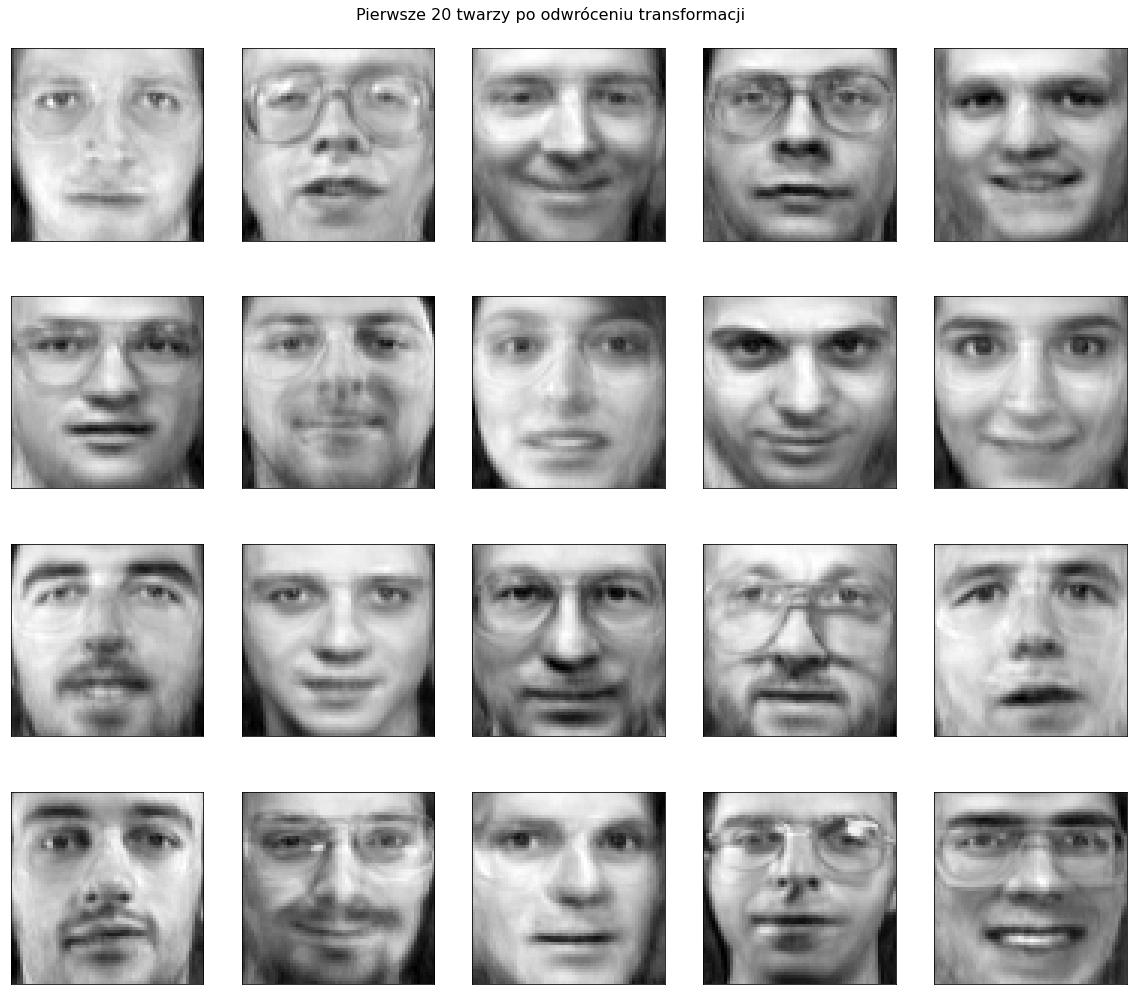

In [47]:
plot_images(faces_inversed[ind], "Pierwsze 20 twarzy po odwróceniu transformacji", 5, 4) 

Widzimy stratę w jakości, ale nie jest ona znacząca - obrazki są po prostu wyświetlane w dużym rozmiarze. 
Policzmy jak wygląda błąd rekonstrukcji, korzystając z RMSE poszczególnych przekształconych obrazów względem oryginałów. 

In [48]:
from sklearn.metrics import mean_squared_error

In [49]:
rmse = [0] * len(faces)
for i in range(len(faces)):
    rmse[i] = mean_squared_error(faces[i], faces_inversed[i], squared=False)

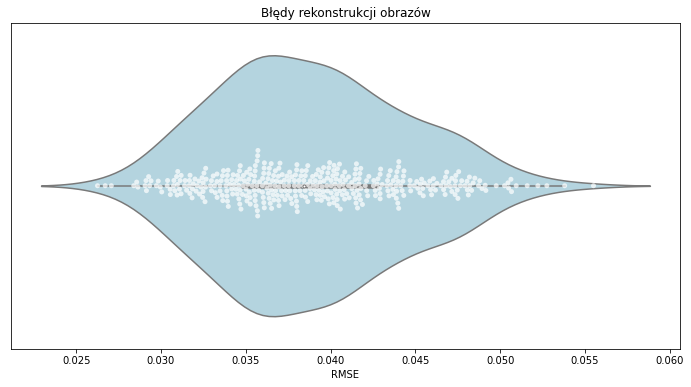

In [61]:
plt.figure(figsize=(12, 6))
sns.swarmplot(data = rmse, orient = "h",
                   color="white", edgecolor="gray", alpha=0.7)
sns.violinplot(data = rmse, orient = "h", alpha=0.2, color="lightblue")
plt.yticks(())
plt.title("Błędy rekonstrukcji obrazów")
plt.xlabel("RMSE")
plt.show()

In [129]:
def print_rmse_results(data):
    print(f"""Średnie RMSE: {np.mean(data):.4f}
Odchylenie standardowe z RMSE: {np.std(data):.4f}
Minimalne RMSE: {np.min(data):.4f}
Maksymalne RMSE: {np.max(data):.4f}""")
    
print_rmse_results(rmse)

Średnie RMSE: 0.0389
Odchylenie standardowe z RMSE: 0.0055
Minimalne RMSE: 0.0263
Maksymalne RMSE: 0.0555


### 3. Przygotować kilka / kilkanaście zmodyfikowanych obrazów (np. obróconych o 90 stopni, przyciemnionych, odbitych w poziomie).

In [67]:
to_rotate = ind
to_rotate

array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
       130, 140, 150, 160, 170, 180, 190])

In [90]:
rotated_faces = faces[to_rotate]
for i in range(20):
    tmp = np.transpose(rotated_faces[i].reshape((64, 64)))
    rotated_faces[i] = tmp.reshape((4096,) )

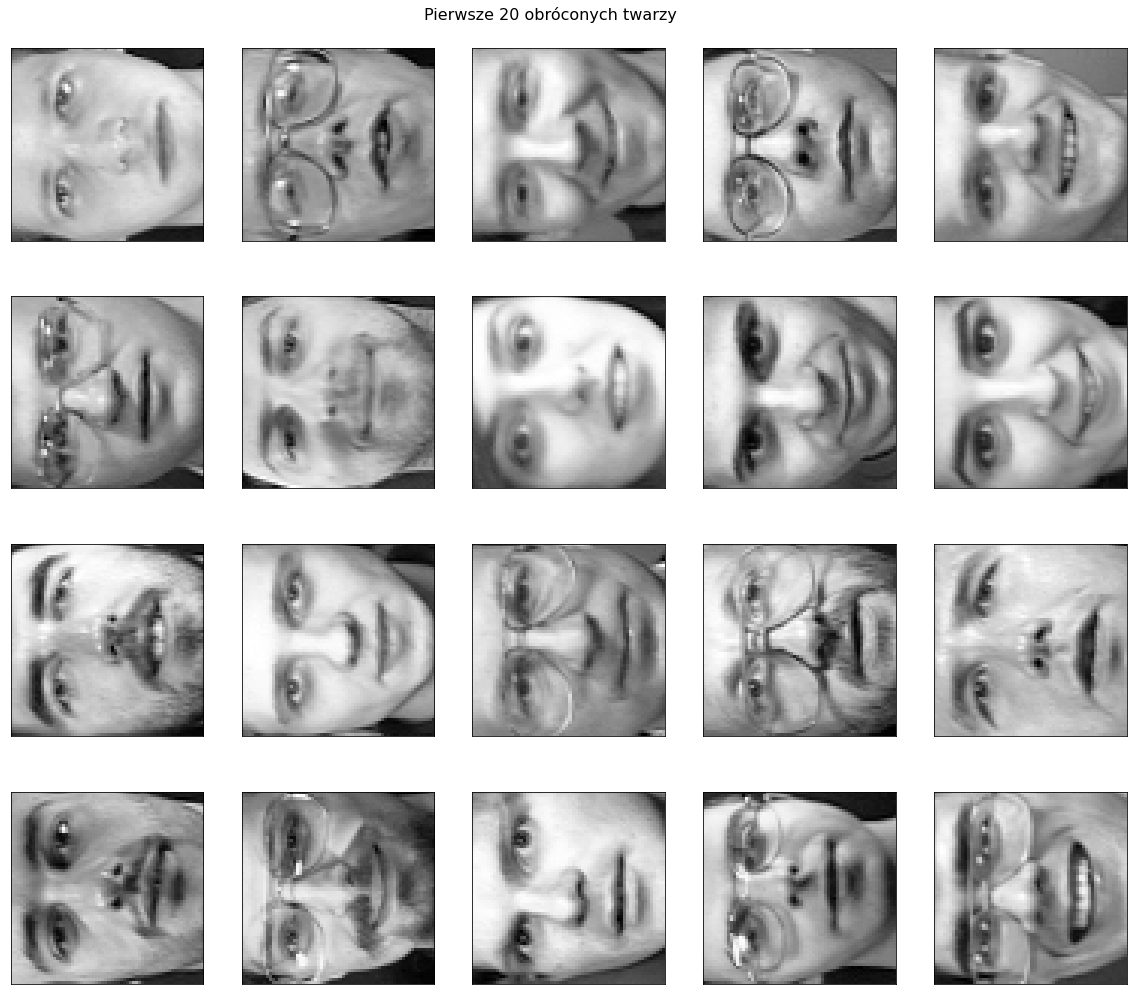

In [91]:
plot_images(rotated_faces, "Pierwsze 20 obróconych twarzy", 5, 4)

In [93]:
to_darken = ind+1
to_darken

array([  1,  11,  21,  31,  41,  51,  61,  71,  81,  91, 101, 111, 121,
       131, 141, 151, 161, 171, 181, 191])

In [153]:
darkened_faces = faces[to_darken]
darkened_faces = np.clip(darkened_faces - 0.3, 0, 1)

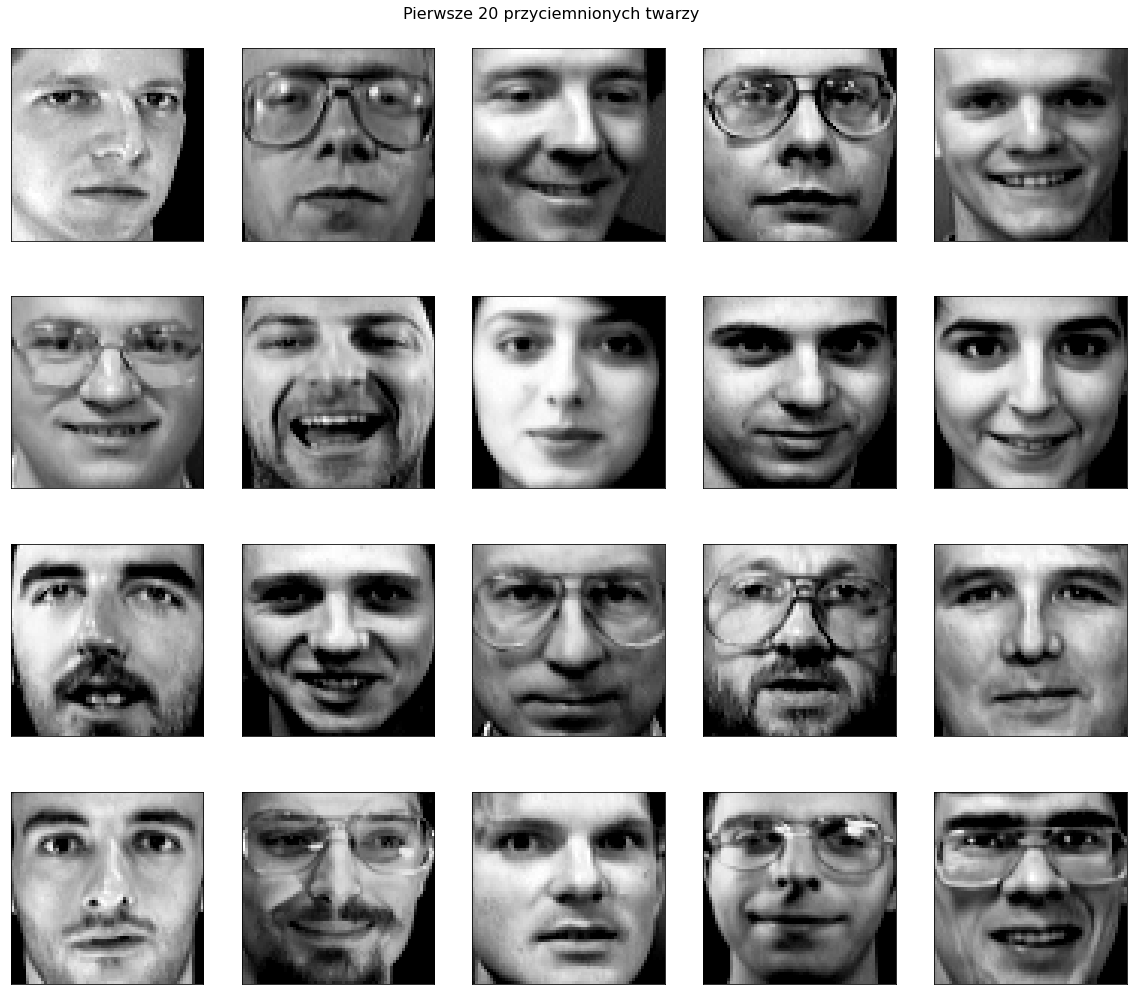

In [154]:
plot_images(darkened_faces, "Pierwsze 20 przyciemnionych twarzy", 5, 4)

In [155]:
to_lighten = ind+2 
to_lighten

array([  2,  12,  22,  32,  42,  52,  62,  72,  82,  92, 102, 112, 122,
       132, 142, 152, 162, 172, 182, 192])

In [156]:
lightened_faces = faces[to_lighten]
lightened_faces = np.clip(lightened_faces + 0.3, 0, 1)

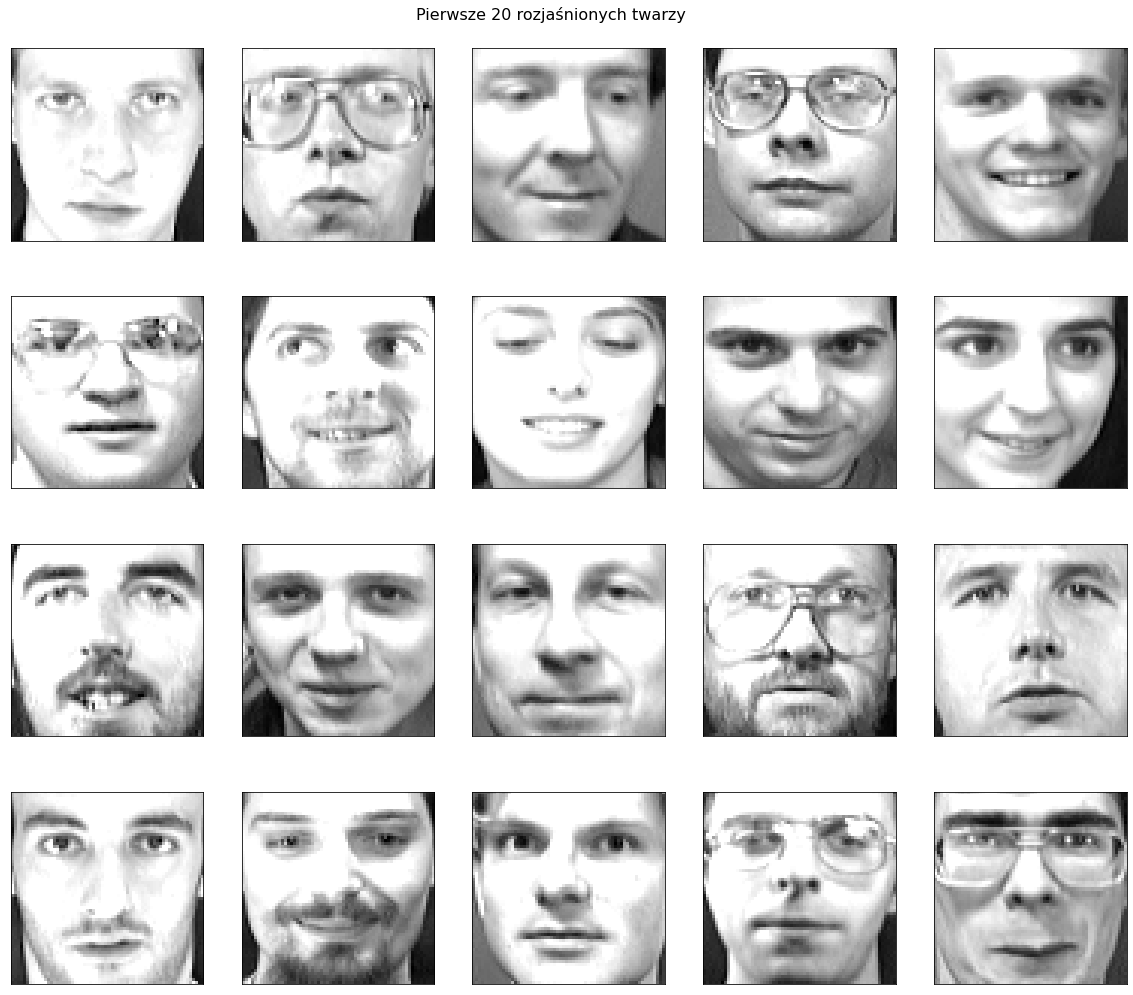

In [157]:
plot_images(lightened_faces, "Pierwsze 20 rozjaśnionych twarzy", 5, 4)

In [75]:
to_flip = ind+3 
to_flip

array([  3,  13,  23,  33,  43,  53,  63,  73,  83,  93, 103, 113, 123,
       133, 143, 153, 163, 173, 183, 193])

In [105]:
flipped_faces = faces[to_flip]
flipped_faces = np.flip(flipped_faces)

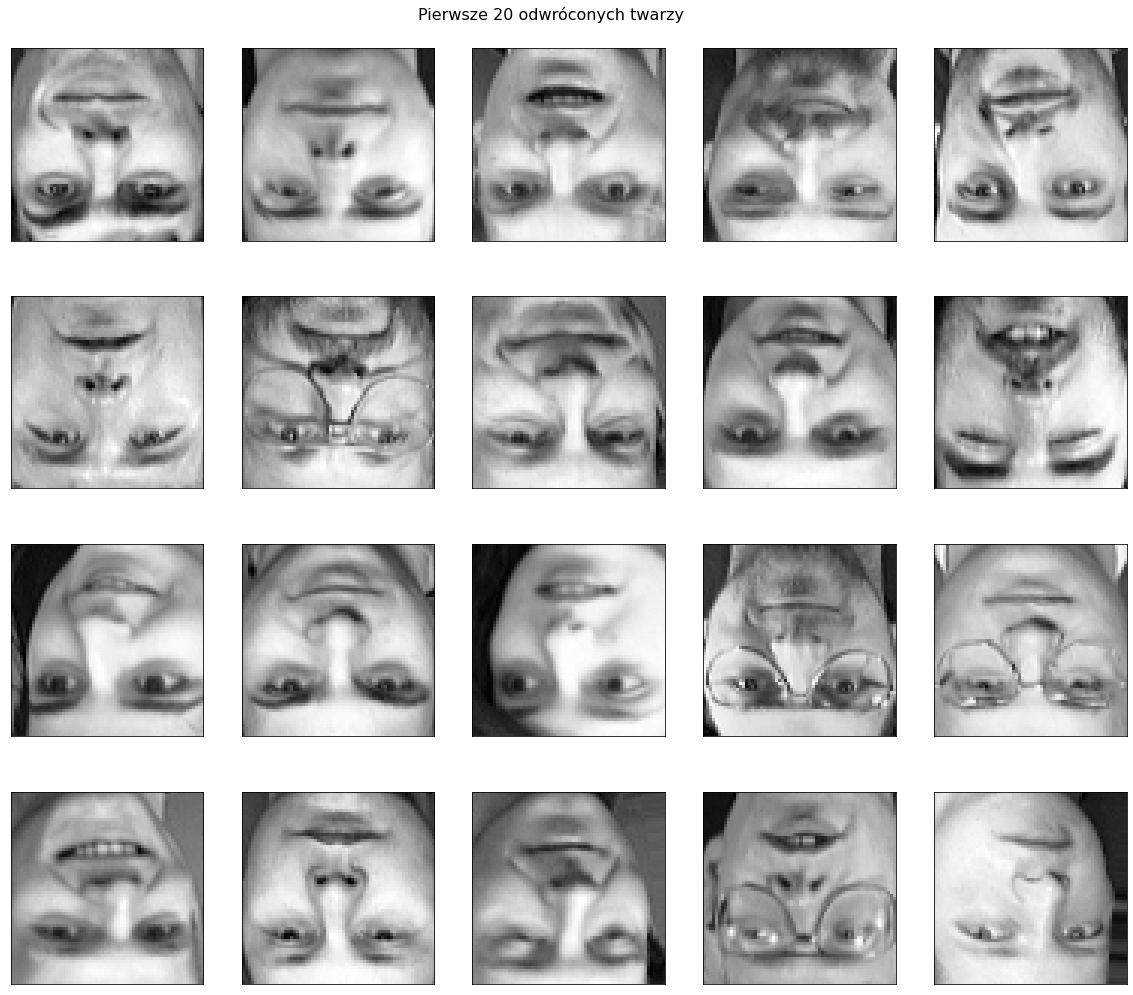

In [108]:
plot_images(flipped_faces, "Pierwsze 20 odwróconych twarzy", 5, 4)

### 4. Korzystając z modelu wyuczonego w pkt. 1 przeprowadzić transformację, a następnie odwrotną transformację obrazów z pkt. 3. Obliczyć błąd rekonstrukji dla każdego typu modyfikacji. Porównać z wartościami błędu uzyskanymi w pkt. 2.

In [148]:
def pca_inverse_transform_modified(modified_pictures, ind_of_modified):
    transformed_modified_pictures = pca_used.transform(modified_pictures)
    inversed_modified_pictures = pca_used.inverse_transform(transformed_modified_pictures)
    rmse_of_modified = [0] * len(modified_pictures)
    for i in range(len(modified_pictures)):
        rmse_of_modified[i] = mean_squared_error(faces[ind_of_modified[i]], inversed_modified_pictures[i], squared=False)
    return inversed_modified_pictures, rmse_of_modified

In [158]:
inv_rotated, rmse_rotated = pca_inverse_transform_modified(rotated_faces, to_rotate)
inv_darkened, rmse_darkened = pca_inverse_transform_modified(darkened_faces, to_darken)
inv_lightened, rmse_lightened = pca_inverse_transform_modified(lightened_faces, to_lighten)
inv_flipped, rmse_flipped = pca_inverse_transform_modified(flipped_faces, to_flip)

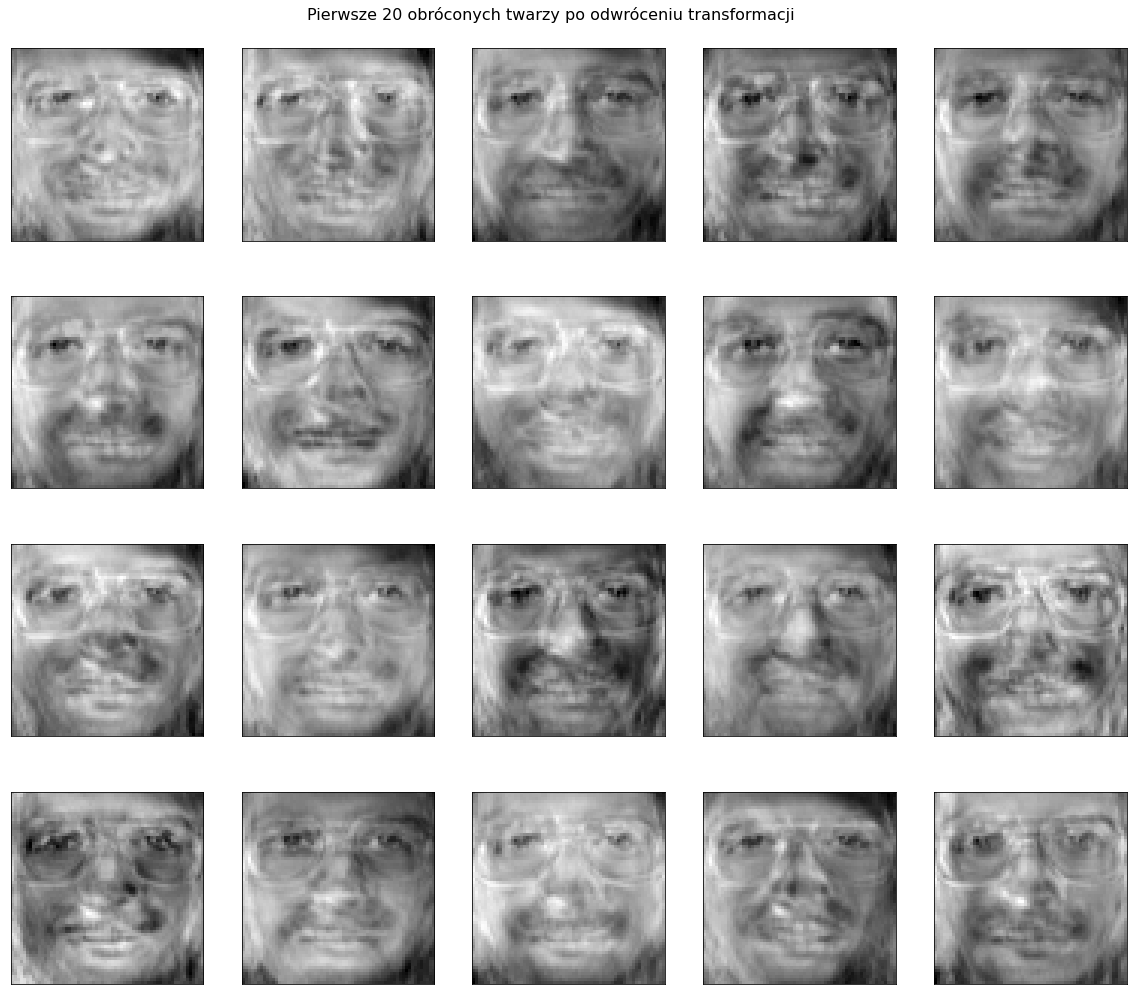

Średnie RMSE: 0.1781
Odchylenie standardowe z RMSE: 0.0328
Minimalne RMSE: 0.1199
Maksymalne RMSE: 0.2486


In [159]:
plot_images(inv_rotated, "Pierwsze 20 obróconych twarzy po odwróceniu transformacji", 5, 4)
print_rmse_results(rmse_rotated)

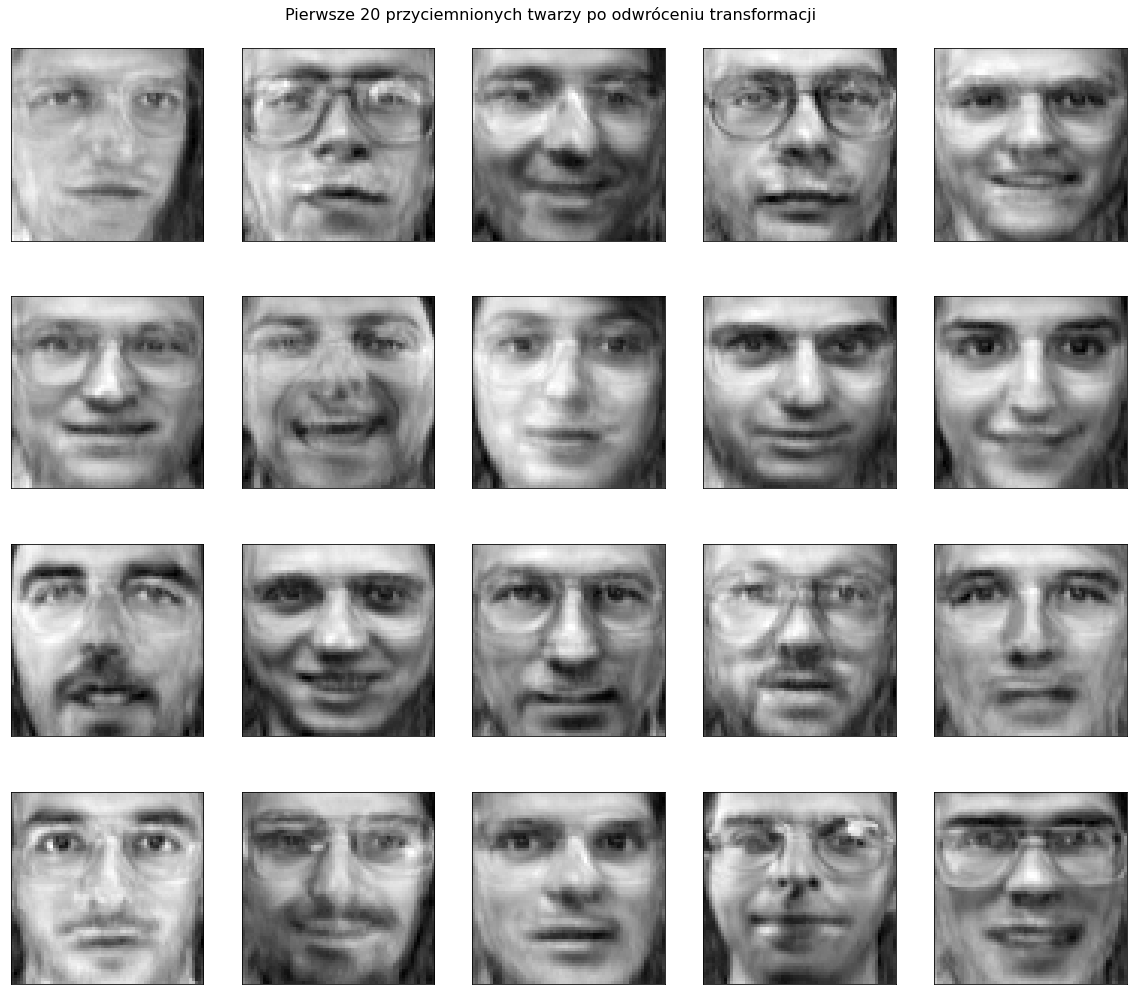

Średnie RMSE: 0.2949
Odchylenie standardowe z RMSE: 0.0047
Minimalne RMSE: 0.2865
Maksymalne RMSE: 0.3009


In [160]:
plot_images(inv_darkened, "Pierwsze 20 przyciemnionych twarzy po odwróceniu transformacji", 5, 4) 
print_rmse_results(rmse_darkened)

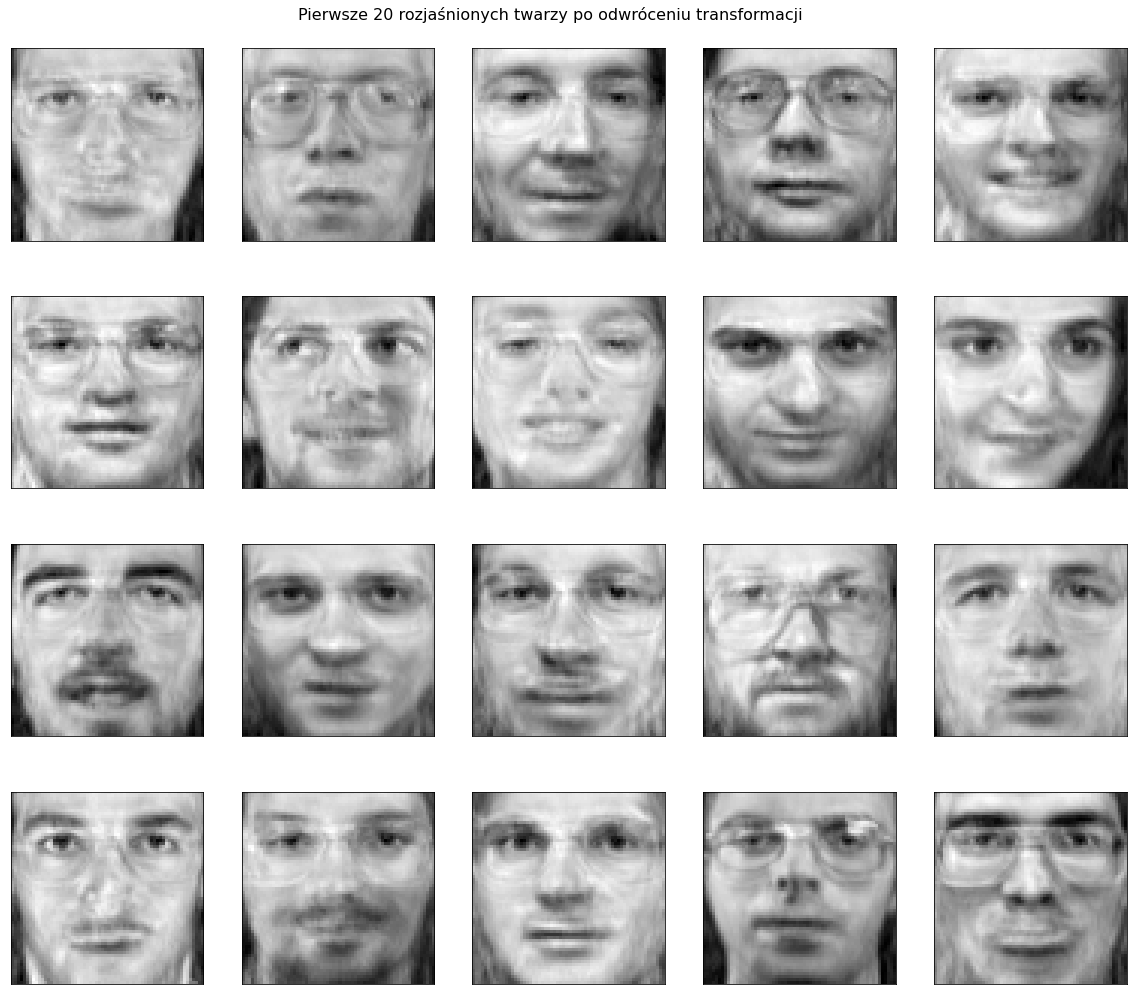

Średnie RMSE: 0.2868
Odchylenie standardowe z RMSE: 0.0086
Minimalne RMSE: 0.2640
Maksymalne RMSE: 0.2980


In [164]:
plot_images(inv_lightened, "Pierwsze 20 rozjaśnionych twarzy po odwróceniu transformacji", 5, 4) 
print_rmse_results(rmse_lightened)

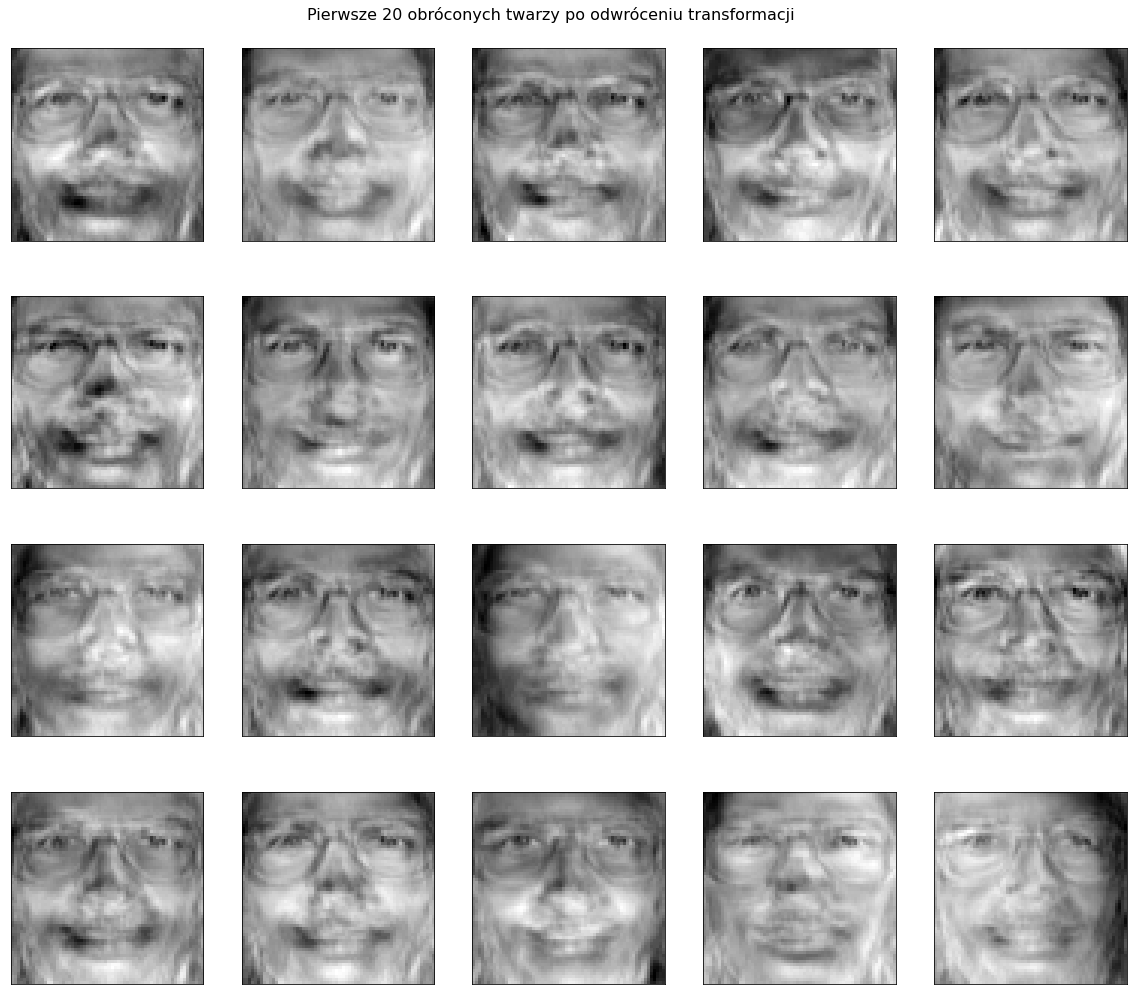

Średnie RMSE: 0.2269
Odchylenie standardowe z RMSE: 0.0267
Minimalne RMSE: 0.1910
Maksymalne RMSE: 0.2955


In [163]:
plot_images(inv_flipped, "Pierwsze 20 obróconych twarzy po odwróceniu transformacji", 5, 4) 
print_rmse_results(rmse_flipped)

### 5. Czy PCA może służyć do wykrywania pewnego typu anomalii w zdjęciach twarzy? Jeżeli tak to jakich?

In [173]:
modified_df = pd.DataFrame({"rotated": rmse_rotated, "darkened": rmse_darkened, 
              "lightened":rmse_lightened, "flipped": rmse_flipped}).describe()
original_df = pd.DataFrame({"original": rmse}).describe()
pd.concat([modified_df, original_df], axis=1)

,rotated,darkened,lightened,flipped,original
count,20.000000,20.000000,20.000000,20.000000,400.000000
mean,0.178089,0.294862,0.286812,0.226935,0.038874
std,0.033699,0.004833,0.008853,0.027370,0.005507
min,0.119946,0.286527,0.264009,0.190962,0.026260
25%,0.159895,0.291665,0.282967,0.214921,0.034856
50%,0.172004,0.296482,0.287931,0.222081,0.038409
75%,0.193409,0.298511,0.293142,0.229873,0.042671
max,0.248632,0.300925,0.297974,0.295460,0.055497


Na podstawie wygenerowanych wyników widzimy, że RMSE w przypadku zdjęć poddanych pewnym modyfikacjom jest dużo większe, to inny rząd wielkości niż w przypadku niezmodyfikowanych zdjęć, na których trenowane było PCA. 

Zatem możemy wnioskować, że PCA może służyć w wykrywaniu anomalii w zdjęciach twarzy - ich prześwietleniu lub zaciemnieniu, a także różnym obrotom (nie samej twarzy, a zdjęcia). 